In [6]:
import time
import copy
import glob

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named '_lzma'

In [5]:
pip install lzma

ERROR: Could not find a version that satisfies the requirement lzma (from versions: none)
ERROR: No matching distribution found for lzma
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pickle as pkl
import tensorflow as tf
#from tensorflow.keras.applications.resnet34 import ResNet34,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
#from classification_models.tfkeras import Classifiers  # External library
from classification_models.keras import Classifiers

# Load ResNet34 model
ResNet34, preprocess_input = Classifiers.get('resnet34')


from IPython.display import Image

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

ModuleNotFoundError: No module named 'classification_models.keras'

In [4]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))

NameError: name 'os' is not defined

In [8]:
len(filenames)

44441

In [9]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [6]:
img = image.load_img('1608.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


array([0.00303745, 0.03646564, 0.        , ..., 0.        , 0.01630189,
       0.04517902], dtype=float32)

In [10]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [11]:
image_features = []
for file in filenames:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━

[array([0.0068408 , 0.03663963, 0.0123835 , ..., 0.01264841, 0.        ,
        0.02691425], dtype=float32),
 array([0.00243907, 0.00502102, 0.        , ..., 0.00899795, 0.010141  ,
        0.02011691], dtype=float32),
 array([0.00300275, 0.02201003, 0.00272649, ..., 0.01291527, 0.01619332,
        0.03272966], dtype=float32),
 array([0.        , 0.00604671, 0.03079082, ..., 0.00867087, 0.01381306,
        0.00205389], dtype=float32),
 array([0.        , 0.02514593, 0.007501  , ..., 0.01606759, 0.02194843,
        0.02754991], dtype=float32),
 array([6.8148051e-04, 9.0113180e-03, 9.9171375e-05, ..., 9.8304674e-03,
        1.3181515e-02, 2.0324744e-02], dtype=float32),
 array([0.        , 0.03170027, 0.00250635, ..., 0.00525804, 0.00400831,
        0.02631919], dtype=float32),
 array([0.00047159, 0.0307015 , 0.00586006, ..., 0.        , 0.00372594,
        0.04489094], dtype=float32),
 array([0.00332702, 0.00109601, 0.01224258, ..., 0.00382173, 0.05124391,
        0.0272653 ], dtype=fl

In [12]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [13]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [14]:
#load the pickle file
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [15]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [16]:
np.array(Image_features).shape

(44441, 2048)

In [18]:
#Finding Neighboring images

neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [20]:
input_image = extract_features_from_images('1608.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [21]:
distance,indices = neighbors.kneighbors([input_image])

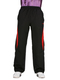

In [25]:
#target image

Image('1608.jpg')

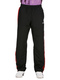

In [28]:
#nearest neighbors based on embeddings/features

Image(filenames[indices[0][1]])

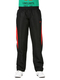

In [30]:
Image(filenames[indices[0][2]])

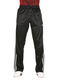

In [31]:
Image(filenames[indices[0][3]])

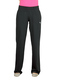

In [32]:
Image(filenames[indices[0][4]])

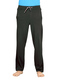

In [33]:
Image(filenames[indices[0][5]])